Clean version of the analysis and results for the IC2S2 paper

In [1]:
from __future__ import absolute_import, division, print_function
import datetime

import pandas as pd
import scipy.stats  as stats
from scipy import special
import numpy as np

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
import imgkit

from collections import OrderedDict

import sys
sys.path.insert(0, '../../../src/data/')

from config import *
from analysis_connections import generate_analysis_connections_store_key

2019-02-12 15:55:29,799 - DEBUG - backend module://ipykernel.pylab.backend_inline version unknown


# Load

In [2]:
company_dyads_annual_full_clean = pd.read_hdf(analysis_notebooks_store_path, 'team_performance/company_dyads_annual_full_clean')
company_dyads_daily_full_clean  = pd.read_hdf(analysis_notebooks_store_path, 'team_performance/company_dyads_daily_full_clean')

In [3]:
members_panel = pd.read_hdf(analysis_notebooks_store_path, 'panels/members_panel')
company_panel = pd.read_hdf(analysis_notebooks_store_path, 'panels/company_panel')
members_panel = members_panel.query('company not in ("Company Q","Company J")')
company_panel = company_panel.query('company not in ("Company Q","Company J")')

In [4]:
daily_survey_data_clean = pd.read_hdf(surveys_clean_store_path, 'daily/daily_survey_data_clean')
daily_survey_data_clean = daily_survey_data_clean.join(members_panel['company'], on='member')
daily_survey_data_clean = daily_survey_data_clean.query('company != "Company Q"')
daily_survey_data_clean = daily_survey_data_clean.query('company != "Company J"')

# Common functions

In [5]:
# Mann–Whitney U test
'''
def compare_groups(data,question_column_postfix, column, g1,g2,test="ttest"):
    """
    column - percentile/tertile/quartile column to use
    g1 - percentile values for the first group
    g2 - same for second group
    """
    print(data[column].value_counts())
    group_a = data.loc[data[column].isin(g1)]
    group_b = data.loc[data[column].isin(g2)] 

    if test == "mw":
        test_function = stats.mannwhitneyu
    elif test == "ttest":
        test_function = stats.ttest_ind
    elif test == "ks":
        test_function = stats.ks_2samp
    elif test =="wmw":
        test_function = stats.wilcoxon
    else:
        return

    print("Test: "+str(test_function))

    q_columns_to_test = ['_mean','_var']#,'_mean_daily_var']
    print("Group sizes: ",",",len(group_a),",",len(group_b))

    columns=[]
    for q in range (1,3):
            question_column = 'Q'+str(q)+question_column_postfix
            columns.append(question_column)
            stat, p = test_function(group_a[question_column], group_b[question_column]) # low p-value = different        
            ma = group_a[question_column].mean()
            sema = group_a[question_column].sem()
            mia= group_a[question_column].median()
            mb = group_b[question_column].mean()
            semb = group_b[question_column].sem()
            mib= group_b[question_column].median()
            print("Q{}, p: {:.2f}, Means: {:.2f} ({:.2f}),{:.2f} ({:.2f}), medians: {:.2f},{:.2f}".format(q, p,ma,sema,mb,semb,mia,mib))
            
    ax = data.boxplot(column=columns, by=column, figsize=(10,4),  showfliers=False, grid=False, showmeans=True)
'''

'\ndef compare_groups(data,question_column_postfix, column, g1,g2,test="ttest"):\n    """\n    column - percentile/tertile/quartile column to use\n    g1 - percentile values for the first group\n    g2 - same for second group\n    """\n    print(data[column].value_counts())\n    group_a = data.loc[data[column].isin(g1)]\n    group_b = data.loc[data[column].isin(g2)] \n\n    if test == "mw":\n        test_function = stats.mannwhitneyu\n    elif test == "ttest":\n        test_function = stats.ttest_ind\n    elif test == "ks":\n        test_function = stats.ks_2samp\n    elif test =="wmw":\n        test_function = stats.wilcoxon\n    else:\n        return\n\n    print("Test: "+str(test_function))\n\n    q_columns_to_test = [\'_mean\',\'_var\']#,\'_mean_daily_var\']\n    print("Group sizes: ",",",len(group_a),",",len(group_b))\n\n    columns=[]\n    for q in range (1,3):\n            question_column = \'Q\'+str(q)+question_column_postfix\n            columns.append(question_column)\n      

In [6]:
# Mann–Whitney U test
def compare_groups(data,question_column_postfix, column, g1,g2,test="ttest", showfliers=True):
    """
    column - percentile/tertile/quartile column to use
    g1 - percentile values for the first group
    g2 - same for second group
    """
    print(data[column].value_counts())
    group_a = data.loc[data[column].isin(g1)]
    group_b = data.loc[data[column].isin(g2)] 

    if test == "mw":
        test_function = stats.mannwhitneyu
    elif test == "ttest":
        test_function = stats.ttest_ind
    elif test == "ks":
        test_function = stats.ks_2samp
    elif test =="wmw":
        test_function = stats.wilcoxon
    else:
        return

    print("Test: "+str(test_function))
        
    q_columns_to_test = ['_mean','_var']#,'_mean_daily_var']
    print("Group sizes: ",",",len(group_a),",",len(group_b))

    columns=[]
    for q in range (1,3):
            question_column = 'Q'+str(q)+question_column_postfix
            columns.append(question_column)
            stat, p = test_function(group_a[question_column], group_b[question_column]) # low p-value = different        
            ma = group_a[question_column].mean()
            mb = group_b[question_column].mean()
            sema = group_a[question_column].sem()
            semb = group_b[question_column].sem()
            print("Q{}, p: {:.2f}, Means: {:.2f} ({:.2f}),{:.2f}({:.2f})".format(q, p,ma,sema,mb,semb))
            
    ax = data.boxplot(column=columns, by=column, figsize=(10,4), grid=False, showmeans=True,  showfliers=showfliers)

# Mann–Whitney U test
def compare_groups_milestons(data, question_column, column, g1,g2,test="ttest"):
    print(data[column].value_counts())
    group_a = data.loc[data[column].isin(g1)]
    group_b = data.loc[data[column].isin(g2)] 


    if test == "mw":
        test_function = stats.mannwhitneyu
    elif test == "ttest":
        test_function = stats.ttest_ind
    elif test == "ks":
        test_function = stats.ks_2samp
    elif test =="wmw":
        test_function = stats.wilcoxon
    else:
        return

    print("Test: "+str(test_function))
    
    print("Group sizes: ",",",len(group_a),",",len(group_b))

    print("------------------------")
    print(question_column)
    stat, p = test_function(group_a[question_column], group_b[question_column]) # low p-value = different        
    ma = group_a[question_column].mean()
    mb = group_b[question_column].mean()
    sema = group_a[question_column].sem()
    semb = group_b[question_column].sem()
    print("p: {:.2f}, Means: {:.2f} ({:.2f}),{:.2f}({:.2f})".format(p,ma,sema,mb,semb))
    ax = data.boxplot(column=[question_column], by=column, figsize=(10,4), grid=False, showmeans=True)
    

Examples:


2    136
1    130
0    101
Name: minutes_62_norm_members_p, dtype: int64
Test: <function ttest_ind at 0x7f10451f07d0>
Group sizes:  , 101 , 136
Q1, p: 0.00, Means: 5.42 (0.09),5.91(0.05)
Q2, p: 0.00, Means: 5.45 (0.09),6.06(0.05)
2    6
0    6
1    5
Name: minutes_62_norm_members_p, dtype: int64
Test: <function ttest_ind at 0x7f10451f07d0>
Group sizes:  , 6 , 11
Q1, p: 0.02, Means: 5.45 (0.16),5.86(0.08)
Q2, p: 0.00, Means: 5.52 (0.16),6.00(0.05)


/home/orenled/Envs/rhythm-private-analysis-deltav18-anon/lib/python2.7/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
2019-02-12 15:55:32,738 - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/home/orenled/Envs/rhythm-private-analysis-deltav17/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


1    7
0    7
2    3
Name: members_count_p, dtype: int64
Test: <function ttest_ind at 0x7f10451f07d0>
Group sizes:  , 7 , 10
Q1, p: 0.02, Means: 5.48 (0.15),5.88(0.07)
Q2, p: 0.09, Means: 5.66 (0.18),5.95(0.06)
2    6
0    6
1    5
Name: minutes_62_norm_members_p, dtype: int64
Test: <function ttest_ind at 0x7f10451f07d0>
Group sizes:  , 6 , 11
------------------------
m123_rank
p: 0.09, Means: 13.17 (1.99),8.45(1.55)


2019-02-12 15:55:33,008 - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans (u'/home/orenled/Envs/rhythm-private-analysis-deltav17/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


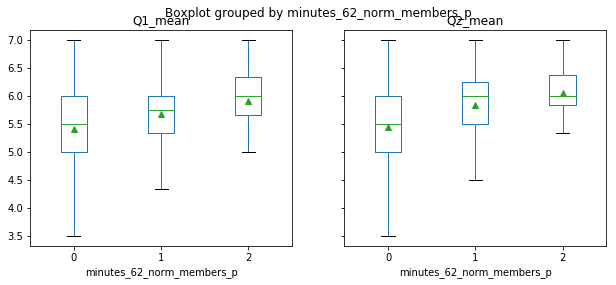

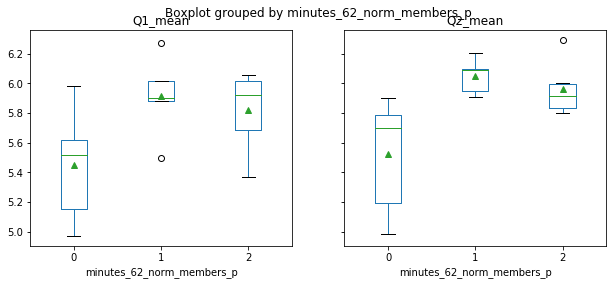

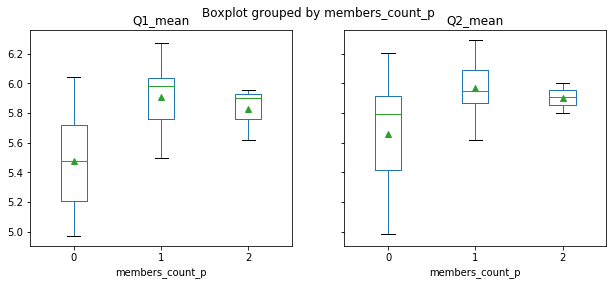

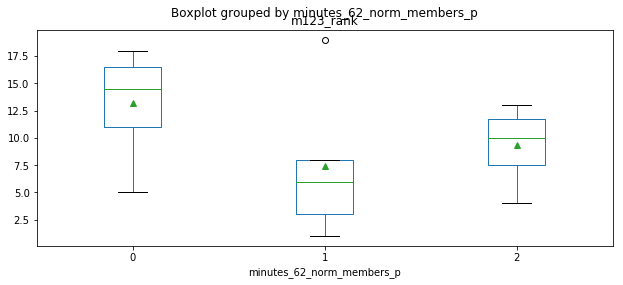

In [7]:
# within team (subjective, daily)
compare_groups(company_dyads_daily_full_clean.dropna(),"_mean", 'minutes_62_norm_members_p',[0],[2], showfliers=False)

# within team (subjective, overall)
compare_groups(company_dyads_annual_full_clean,"_mean", 'minutes_62_norm_members_p', [0],[1,2])


# team size (subjective)
compare_groups(company_dyads_annual_full_clean,'_mean','members_count_p',[0],[1,2])

# with team (objective, overall)
compare_groups_milestons(company_dyads_annual_full_clean,"m123_rank", 'minutes_62_norm_members_p', [0],[1,2])


# Tables

# Descriptive statistics

In [8]:
data = []

In [9]:
# participants
members_active = len(members_panel.query('company not in ("EIR","Staff")'))
data.append(['Participants',members_active, '-', '-', '-', '-'])

members_active = len(members_panel.query('company in ("EIR","Staff")'))
data.append(['Mentors and staff',members_active, '-', '-', '-', '-'])

In [11]:
def list_to_str(l):
    new_l = []
    for x in l:
        new_l.append("{:.2f}".format(float(x)))
    return new_l

In [12]:
# Companies
#data.append(['Companies',len(company_panel), '-', '-', '-', '-'])

data.append(['Company size',len(company_panel)]+list_to_str([
    company_panel.members_count.mean(),
    company_panel.members_count.var(),
    company_panel.members_count.min(),
    company_panel.members_count.max()
]))

In [13]:
# responses
data.append(['Q1 responses',daily_survey_data_clean.Q1.count()]+list_to_str([
    daily_survey_data_clean.Q1.mean(),
    daily_survey_data_clean.Q1.var(),
    daily_survey_data_clean.Q1.min(),
    daily_survey_data_clean.Q1.max()
]))

data.append(['Q1 daily',company_dyads_daily_full_clean.Q1_mean.count()]+list_to_str([
    company_dyads_daily_full_clean.Q1_mean.mean(),
    company_dyads_daily_full_clean.Q1_mean.var(),
    company_dyads_daily_full_clean.Q1_mean.min(),
    company_dyads_daily_full_clean.Q1_mean.max()
]))

data.append(['Q1 overall',company_dyads_annual_full_clean.Q1_mean.count()]+list_to_str([
    company_dyads_annual_full_clean.Q1_mean.mean(),
    company_dyads_annual_full_clean.Q1_mean.var(),
    company_dyads_annual_full_clean.Q1_mean.min(),
    company_dyads_annual_full_clean.Q1_mean.max()
]))

data.append(['Q2 responses',daily_survey_data_clean.Q2.count()]+list_to_str([
    daily_survey_data_clean.Q2.mean(),
    daily_survey_data_clean.Q2.var(),
    daily_survey_data_clean.Q2.min(),
    daily_survey_data_clean.Q2.max()
]))

data.append(['Q2 daily',company_dyads_daily_full_clean.Q2_mean.count()]+list_to_str([
    company_dyads_daily_full_clean.Q2_mean.mean(),
    company_dyads_daily_full_clean.Q2_mean.var(),
    company_dyads_daily_full_clean.Q2_mean.min(),
    company_dyads_daily_full_clean.Q2_mean.max()
]))

data.append(['Q2 overall',company_dyads_annual_full_clean.Q2_mean.count()]+list_to_str([
    company_dyads_annual_full_clean.Q2_mean.mean(),
    company_dyads_annual_full_clean.Q2_mean.var(),
    company_dyads_annual_full_clean.Q2_mean.min(),
    company_dyads_annual_full_clean.Q2_mean.max()
]))

In [14]:
# ranking
data.append(['Milestone Ranking','20','-','-','1','20'])

In [15]:
vcolumns = ['N' ,'Mean' ,'Var' ,'Min' , 'Max' ]
general_stats = pd.DataFrame(data,columns=['measure']+vcolumns)
general_stats

,measure,N,Mean,Var,Min,Max
0,Participants,67,-,-,-,-
1,Mentors and staff,16,-,-,-,-
2,Company size,17,3.94,2.81,2.00,8.00
3,Q1 responses,1397,5.72,1.32,1.00,7.00
4,Q1 daily,416,5.69,0.61,2.50,7.00
5,Q1 overall,17,5.72,0.13,4.97,6.27
6,Q2 responses,1393,5.85,1.20,1.00,7.00
7,Q2 daily,416,5.80,0.63,1.50,7.00
8,Q2 overall,17,5.83,0.12,4.99,6.30
9,Milestone Ranking,20,-,-,1,20


In [16]:
with open("/home/orenled/temp/general_stat.txt", "w") as text_file:
    text_file.write(general_stats.to_latex(index=False))


# Figures - general

In [17]:
sns_palette = "Set3"
#sns.color_palette(sns_palette)[2]

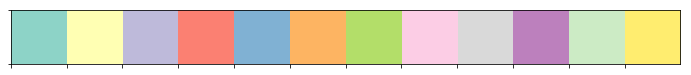

In [18]:
sns.palplot(sns.color_palette(sns_palette))

## Survey data

In [18]:
sns.set(font_scale=1.4) 
sns.set_style("ticks")

In [19]:
period1_end_ts = pd.Timestamp(period1_end, tz=time_zone)
def calc_period(ts):
    if ts <= period1_end_ts: return 0
    else:
        return 1
    
daily_survey_data_clean['ind_period'] = daily_survey_data_clean['effective_ts'].apply(calc_period)

In [20]:
'''
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

def plot_period(data, question_column, period, ax):
    data = data.query("ind_period == "+str(period)).copy()
    data['d'] = data['effective_ts'].rank(method='dense').astype(int) - 1
       
    labels = data[['effective_ts','d']].drop_duplicates().sort_values(by='d')
    labels = labels.effective_ts.dt.strftime('%A (%m-%d)').tolist()

    sns.lineplot(x="d", y=question_column, markers=True, marker="o",
             data=data,ax=ax)#, legend=False)
    
    ax.set_title('Q1, Period '+str(period+1))

    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels)
    plt.setp(ax.get_xticklabels(), rotation=90)
    
    
def plot_timeline_by_period(data, question):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharey=True)

    plot_period(data, "Q{}".format(question), 0, ax1)
    plot_period(data, "Q{}".format(question), 1, ax2)
    
    ax1.set_ylabel('score')
    ax1.set_xlabel('')
    ax2.set_xlabel('')

    ax1.set_title('Question {}, Period 1'.format(question))
    ax2.set_title('Question {}, Period 2'.format(question))
    return f
'''

'\nfrom matplotlib.dates import DateFormatter\nimport matplotlib.dates as mdates\nimport matplotlib.ticker as ticker\n\ndef plot_period(data, question_column, period, ax):\n    data = data.query("ind_period == "+str(period)).copy()\n    data[\'d\'] = data[\'effective_ts\'].rank(method=\'dense\').astype(int) - 1\n       \n    labels = data[[\'effective_ts\',\'d\']].drop_duplicates().sort_values(by=\'d\')\n    labels = labels.effective_ts.dt.strftime(\'%A (%m-%d)\').tolist()\n\n    sns.lineplot(x="d", y=question_column, markers=True, marker="o",\n             data=data,ax=ax)#, legend=False)\n    \n    ax.set_title(\'Q1, Period \'+str(period+1))\n\n    ax.set_xticks(range(len(labels)))\n    ax.set_xticklabels(labels)\n    plt.setp(ax.get_xticklabels(), rotation=90)\n    \n    \ndef plot_timeline_by_period(data, question):\n    \n    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharey=True)\n\n    plot_period(data, "Q{}".format(question), 0, ax1)\n    plot_period(data, "Q{}".format(

In [128]:
# Unfinished version , with response rate
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

def plot_period(data, question_column, period, ax, ax2):
    data = data.query("ind_period == "+str(period)).copy()
    data['d'] = data['effective_ts'].rank(method='dense').astype(int) - 1
    
    data_agg = data.groupby('d')[[question_column]].count().reset_index()
        
    labels = data[['effective_ts','d']].drop_duplicates().sort_values(by='d')
    labels = labels.effective_ts.dt.strftime('%A (%m-%d)').tolist()

    sns.lineplot(x="d", y=question_column, markers=True, color=sns.color_palette(sns_palette)[4], marker="o",
             data=data,ax=ax, legend=False, label='score')
    
    # Add response rate
    
    sns.lineplot(x="d", y=question_column, markers=True, color=sns.color_palette(sns_palette)[2], marker="o", 
             lw=2, 
             data=data_agg,ax=ax2, legend=False, label='resp. rate')    
    
    ax2.lines[0].set_linestyle("--")
    
    ax.set_title('Q1, Period '+str(period+1))

    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels)
    plt.setp(ax.get_xticklabels(), rotation=90)
    
    ax.set_ylabel('')
    ax2.set_ylabel('')
    if period == 0:
        ax2.get_yaxis().set_ticklabels([])
    if period == 1:
        ax2.set_ylabel('response rate')
        
    return ax,ax2
    
    
def plot_timeline_by_period(data, question):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharey=True)
    ax1_2 = ax1.twinx()
    ax2_2 = ax2.twinx()
    ax1_2.get_shared_y_axes().join(ax1_2, ax2_2)
    
    (ax1_1, ax1_2) = plot_period(data, "Q{}".format(question), 0, ax1,ax1_2)
    (ax2_1, ax2_2) = plot_period(data, "Q{}".format(question), 1, ax2,ax2_2)
    
    ax1.set_ylabel('score')
    ax1.set_xlabel('')
    ax2.set_ylabel('')
    ax2.set_xlabel('')

    ax1.set_title('Question {}, Period 1'.format(question))
    ax2.set_title('Question {}, Period 2'.format(question))
    
    f.legend(handles=[ax1.lines[0], ax1_2.lines[0]], loc=7)
    #f.tight_layout()
    f.subplots_adjust(right=0.75)  
    plt.show()

    return f

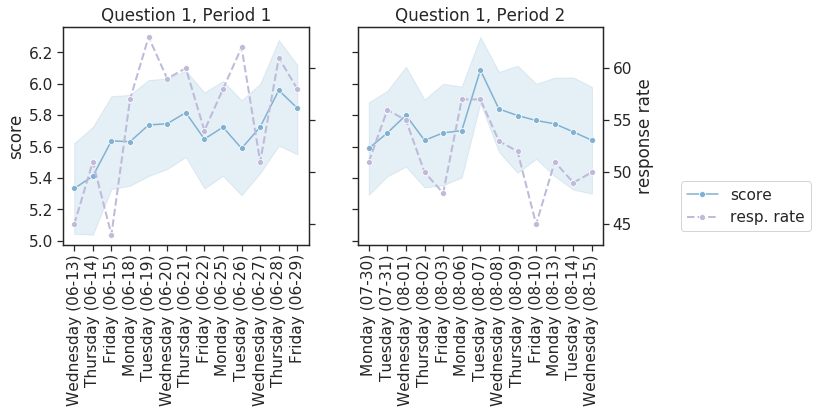

In [129]:
f = plot_timeline_by_period(daily_survey_data_clean,1)
f.savefig('/home/orenled/temp/q1_timeline.png', bbox_inches='tight')

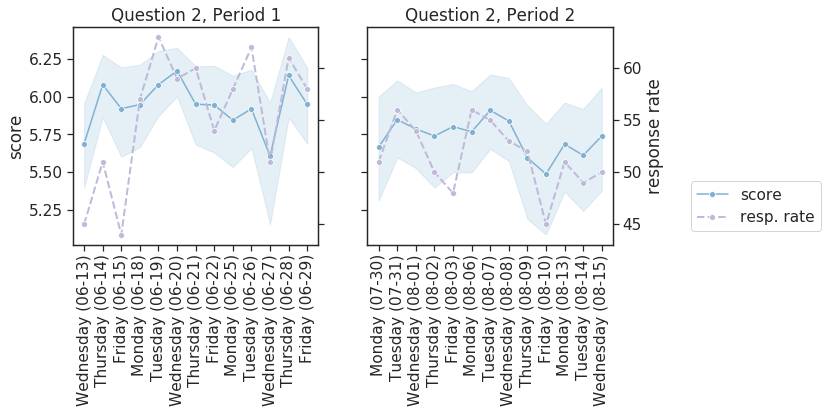

In [130]:
f = plot_timeline_by_period(daily_survey_data_clean,2)
f.savefig('/home/orenled/temp/q2_timeline.png', bbox_inches='tight')

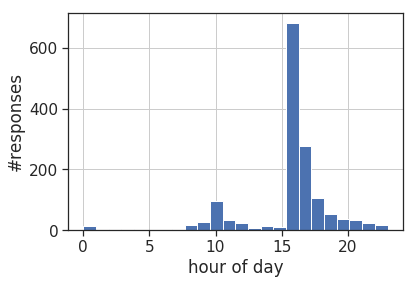

In [324]:
daily_survey_data_anon = pd.read_hdf(surveys_anon_store_path, 'daily/daily_survey_data_anon')
daily_survey_data_anon['RecordedDate_ts'] = pd.to_datetime(daily_survey_data_anon['RecordedDate']).dt.tz_localize(time_zone)
daily_survey_data_anon['h'] = daily_survey_data_anon['RecordedDate_ts'].dt.hour

ax = daily_survey_data_anon.h.hist(bins=24)
ax.set_ylabel('#responses')
ax.set_xlabel('hour of day')

fig = ax.get_figure()
fig.savefig('/home/orenled/temp/q12_hour_dist.png', bbox_inches='tight')

# Figures - population comparison (communication, performance, team size)

In [39]:
sns.set(font_scale=1.4) 
sns.set_style("ticks")

In [ ]:
#def boxplot_two_questions(data,lables=['low','mid','high'],wiskers=False):
    
    

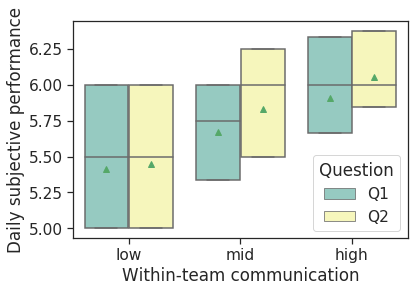

In [48]:
## Daily, subjective, minutes

daily_minutes = company_dyads_daily_full_clean.dropna()\
    [['Q1_mean','Q2_mean','minutes_62_norm_members_p']]\
    .rename(columns={'Q1_mean':'Q1','Q2_mean':'Q2'})\
    .set_index('minutes_62_norm_members_p').stack().reset_index()\
    .rename(columns={'level_1':'Question',0:'mean'})

ax = sns.boxplot(x="minutes_62_norm_members_p", y="mean", hue="Question",
    data=daily_minutes, showmeans=True, showfliers=False, palette="Set3", whis=0.0)
ax.set(xlabel='Within-team communication', ylabel='Daily subjective performance')
ax.legend(loc='lower right', frameon=True, title="Question")

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'low'
labels[1] = 'mid'
labels[2] = 'high'
ax.set_xticklabels(labels)

fig = ax.get_figure()
fig.savefig('/home/orenled/temp/fig1.png', bbox_inches='tight')

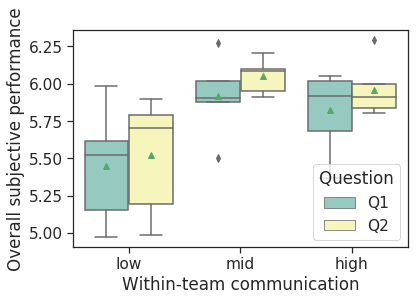

In [50]:
## Overall, subjective, minutes

overall_subjective_minutes = company_dyads_annual_full_clean\
    [['Q1_mean','Q2_mean','minutes_62_norm_members_p']]\
    .rename(columns={'Q1_mean':'Q1','Q2_mean':'Q2'})\
    .set_index('minutes_62_norm_members_p').stack().reset_index()\
    .rename(columns={'level_1':'Question',0:'mean'})

ax = sns.boxplot(x="minutes_62_norm_members_p", y="mean", hue="Question",
    data=overall_subjective_minutes, showmeans=True, showfliers=True, palette="Set3")
ax.set(xlabel='Within-team communication', ylabel='Overall subjective performance')
ax.legend(loc='lower right', frameon=True, title="Question")

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'low'
labels[1] = 'mid'
labels[2] = 'high'
ax.set_xticklabels(labels)


fig = ax.get_figure()
fig.savefig('/home/orenled/temp/fig2.png', bbox_inches='tight')

In [42]:
company_dyads_annual_full_clean[['members_count_p','members_count']].groupby('members_count_p').agg(['min','max'])

members_count     
                          min  max
members_count_p                   
0                         2.0  3.0
1                         4.0  4.0
2                         6.0  8.0

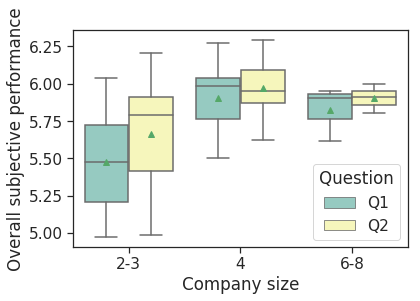

In [43]:
## Overall, team size, subjective
overall_subjective_minutes = company_dyads_annual_full_clean\
    [['Q1_mean','Q2_mean','members_count_p']]\
    .rename(columns={'Q1_mean':'Q1','Q2_mean':'Q2'})\
    .set_index('members_count_p').stack().reset_index()\
    .rename(columns={'level_1':'Question',0:'mean'})

ax = sns.boxplot(x="members_count_p", y="mean", hue="Question",
    data=overall_subjective_minutes, showmeans=True, showfliers=True, palette="Set3")
ax.set(xlabel='Company size', ylabel='Overall subjective performance')
ax.legend(loc='lower right', frameon=True, title="Question")

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '2-3'
labels[1] = '4'
labels[2] = '6-8'
ax.set_xticklabels(labels)

fig = ax.get_figure()
fig.savefig('/home/orenled/temp/fig3.png', bbox_inches='tight')

In [44]:
for x in ax.get_xticklabels():
    print(x)

Text(0,0,'2-3')
Text(1,0,'4')
Text(2,0,'6-8')


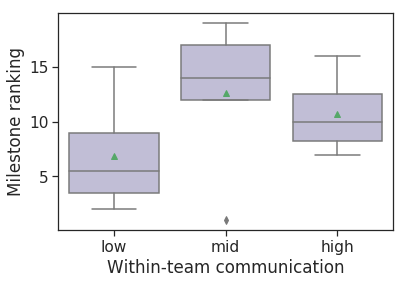

In [49]:
## Overall, objective, minutes

overall_objective_minutes = company_dyads_annual_full_clean\
    [['m123_rank','minutes_62_norm_members_p']].copy()

overall_objective_minutes['m123_rank_r'] = overall_objective_minutes.m123_rank.max() - overall_objective_minutes.m123_rank + 1

ax = sns.boxplot(x="minutes_62_norm_members_p", y="m123_rank_r",
    data=overall_objective_minutes, showmeans=True, showfliers=True, color=sns.color_palette("Set3")[2])
ax.set(xlabel='Within-team communication', ylabel='Milestone ranking')

'''
# Calculate number of obs per group & median to position labels
df = overall_objective_minutes
medians = df.groupby(['minutes_62_norm_members_p'])['m123_rank'].median().values
means = df.groupby(['minutes_62_norm_members_p'])['m123_rank'].mean().values
nobs = df['minutes_62_norm_members_p'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    if medians[tick] > means[tick]:
        offset = 0.4
    else:
        offset = -1.1
        
    ax.text(pos[tick], medians[tick] + offset, nobs[tick],
    horizontalalignment='center', size='large', color='w', weight='semibold')
'''
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'low'
labels[1] = 'mid'
labels[2] = 'high'
ax.set_xticklabels(labels)


fig = ax.get_figure()
fig.savefig('/home/orenled/temp/fig4.png', bbox_inches='tight')